<a href="https://colab.research.google.com/github/Ishita95-harvad/Female-Faces---Image-Dataset/blob/main/Female_Faces_Image_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Female Faces - Image Dataset**
Face recognition dataset with photos of women, face dataset


---



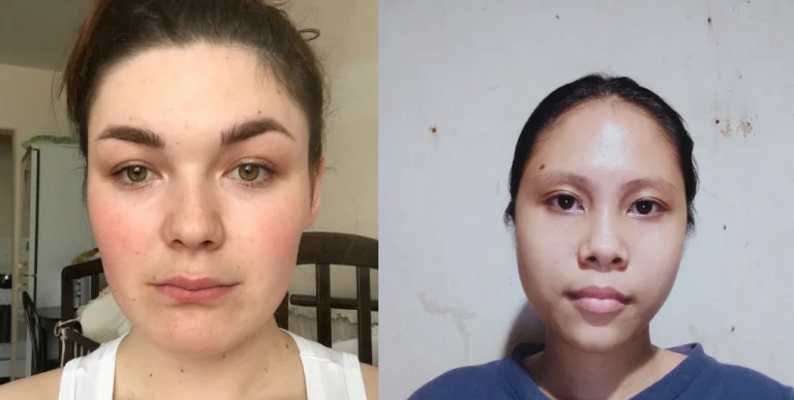



---



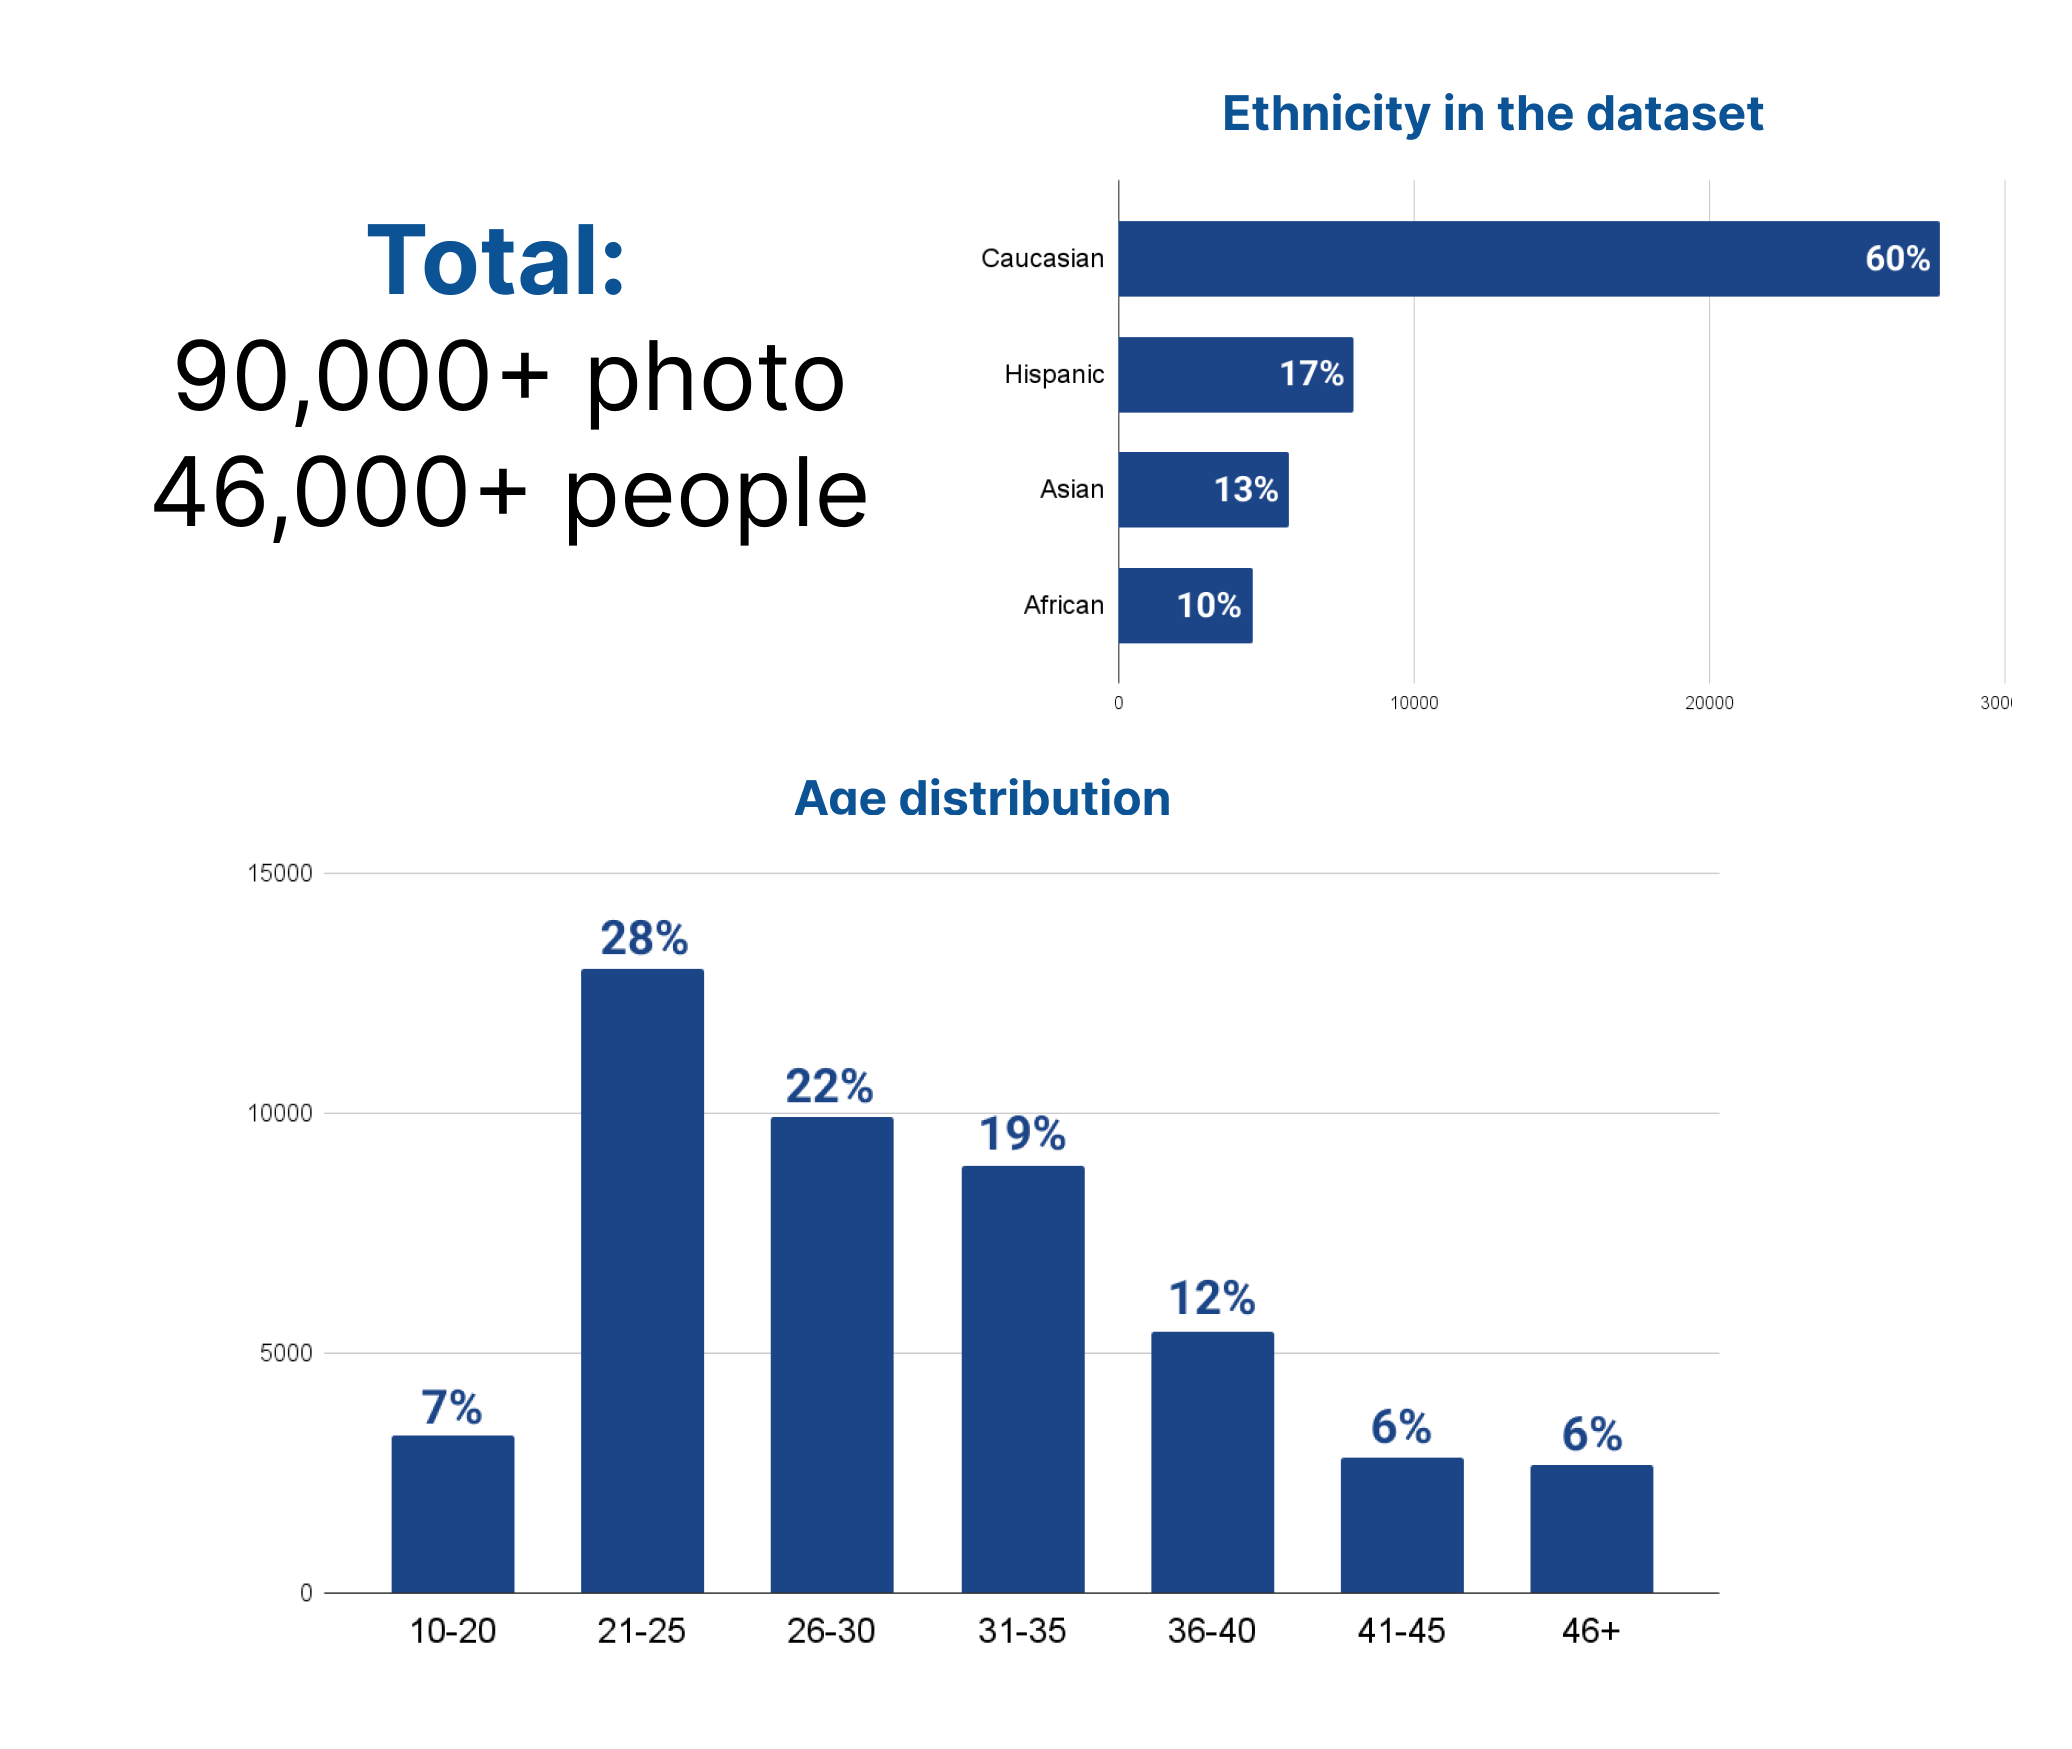



---



## Data loading

### Subtask:
Load the "women_dataset.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "women_dataset.csv" file into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('women_dataset.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'women_dataset.csv' not found.")
    df = None  # or handle the error appropriately
except pd.errors.EmptyDataError:
    print("Error: 'women_dataset.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'women_dataset.csv'. Check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,id,photo,age,country,ethnicity,photo_extension,photo_resolution
0,1,/1.jpg,30,AR,Hispanic,jpg,4640 x 3488
1,2,/2.jpg,24,ID,East Asia,jpg,3264 x 2448
2,3,/3.jpg,33,KE,Africans,jpg,3264 x 2448
3,4,/4.jpg,22,IN,South Asia,jpg,3296 x 1854
4,5,/5.jpg,19,RU,Caucasians,jpg,3088 x 2316


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, data types of each column, and the distribution of key features. Also determine the shape of the data.


**Reasoning**:
I need to explore the dataset by examining its shape, data types, descriptive statistics, and distributions of key features.  I will also identify missing values.



Shape of the DataFrame: (20, 7)

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20 non-null     int64 
 1   photo             20 non-null     object
 2   age               20 non-null     int64 
 3   country           20 non-null     object
 4   ethnicity         20 non-null     object
 5   photo_extension   20 non-null     object
 6   photo_resolution  20 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.2+ KB

Descriptive Statistics for Numerical Features:
             id       age
count  20.00000  20.00000
mean   10.50000  31.35000
std     5.91608  10.80095
min     1.00000  19.00000
25%     5.75000  23.00000
50%    10.50000  30.00000
75%    15.25000  36.00000
max    20.00000  64.00000

Value Counts for Categorical Features:

Value counts for 'country':
country
BR    4
IN    2
ID 

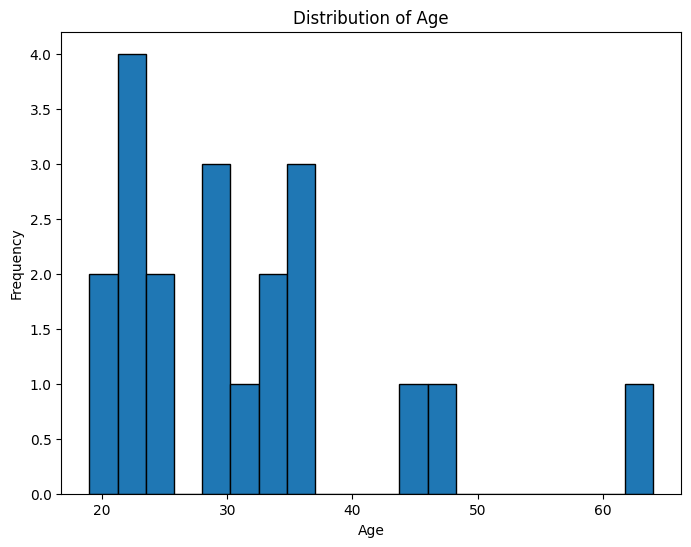

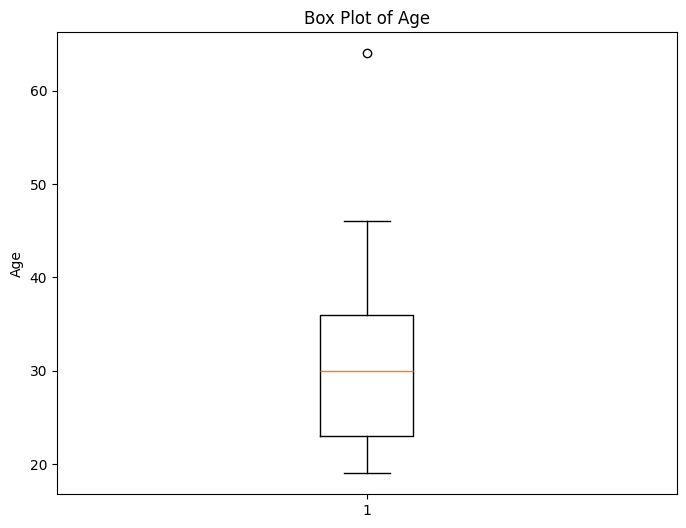

In [2]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get information about the DataFrame, including data types and missing values
print("\nDataFrame Information:")
df.info()

# Descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())

# Value counts for categorical features
print("\nValue Counts for Categorical Features:")
for col in ['country', 'ethnicity', 'photo_extension']:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

# Visualize the distribution of key numerical features (e.g., 'age')
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['age'])
plt.ylabel('Age')
plt.title('Box Plot of Age')
plt.show()

## Data cleaning

### Subtask:
Handle potential outliers in the 'age' column and inconsistencies in the data.


**Reasoning**:
Handle outliers in the 'age' column by capping them at the 95th percentile.  Then, check for inconsistencies in other columns and correct or remove them as needed. Finally, save the cleaned DataFrame.



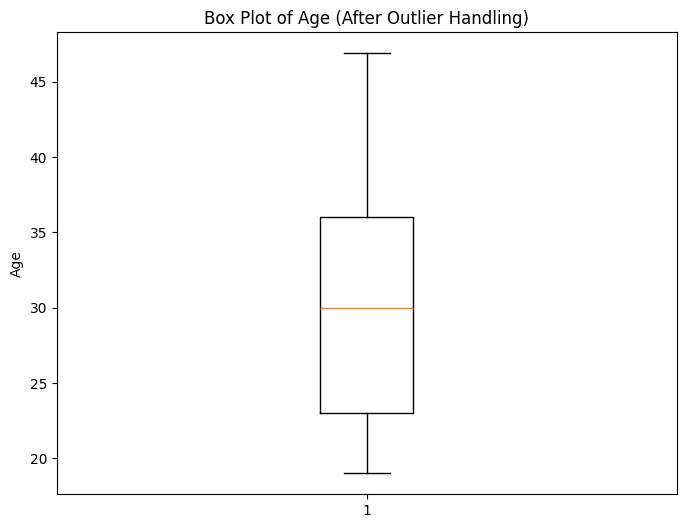

In [3]:
# Handle outliers in 'age' by capping at the 95th percentile
age_95th_percentile = df['age'].quantile(0.95)
df['age'] = df['age'].clip(upper=age_95th_percentile)

# Check for inconsistencies and correct them
# Example: Check for invalid photo extensions (assuming only 'jpg' is valid)
# In a real scenario, you might have more sophisticated checks and corrections
df = df[df['photo_extension'] == 'jpg']

# Example: Check for inconsistencies in 'country' (if needed)
# ...

# Save the cleaned DataFrame
df_cleaned = df.copy()

# Verify the effectiveness of outlier handling
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['age'])
plt.ylabel('Age')
plt.title('Box Plot of Age (After Outlier Handling)')
plt.show()

## Data preparation

### Subtask:
Prepare the data for clustering by selecting relevant features, encoding categorical variables, and scaling numerical features.


**Reasoning**:
Select relevant features, encode categorical features, and scale numerical features for clustering.



In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Feature Selection
selected_features = ['age', 'country', 'ethnicity']
df_selected = df_cleaned[selected_features].copy()

# Encoding Categorical Features
categorical_cols = ['country', 'ethnicity']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df_selected[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
df_encoded = pd.concat([df_selected.drop(categorical_cols, axis=1), encoded_df], axis=1)


# Scaling Numerical Features
scaler = StandardScaler()
df_encoded['age'] = scaler.fit_transform(df_encoded[['age']])
df_scaled = df_encoded.copy()

display(df_scaled.head())

,age,country_AR,country_BR,country_DO,country_FI,country_ID,country_IN,country_KE,country_KZ,country_PH,...,country_TN,country_TR,country_ZA,country_ZM,ethnicity_Africans,ethnicity_Caucasians,ethnicity_East Asia,ethnicity_Hispanic,ethnicity_Middle East,ethnicity_South Asia
0,-0.059641,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.782556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.301817,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.023528,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.384985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Data clustering

### Subtask:
Perform K-means clustering on the prepared dataset.


**Reasoning**:
Perform K-means clustering on the scaled data, evaluate the results using the silhouette score, and store the results in a dictionary.



In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}
for n_clusters in [3, 5, 7]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

df_scaled['cluster_labels'] = kmeans.labels_
display(df_scaled.head())
print(silhouette_scores)

For n_clusters = 3, the average silhouette_score is : 0.12277215549403078
For n_clusters = 5, the average silhouette_score is : 0.17565086754260817
For n_clusters = 7, the average silhouette_score is : 0.21740421441592686


,age,country_AR,country_BR,country_DO,country_FI,country_ID,country_IN,country_KE,country_KZ,country_PH,...,country_TR,country_ZA,country_ZM,ethnicity_Africans,ethnicity_Caucasians,ethnicity_East Asia,ethnicity_Hispanic,ethnicity_Middle East,ethnicity_South Asia,cluster_labels
0,-0.059641,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,-0.782556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
2,0.301817,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
3,-1.023528,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
4,-1.384985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5


{3: np.float64(0.12277215549403078), 5: np.float64(0.17565086754260817), 7: np.float64(0.21740421441592686)}


## Data visualization

### Subtask:
Visualize the clusters obtained from the K-means clustering.


**Reasoning**:
Visualize the clusters using a scatter plot of the first two principal components (or most important features) colored by cluster labels, and create other visualizations as specified in the instructions.



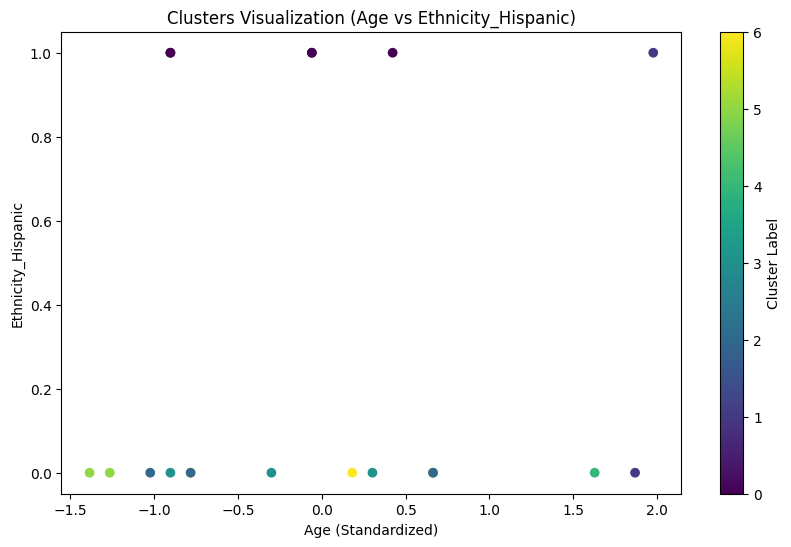

<ipython-input-6-3a474ee65470>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_scaled[df_scaled['cluster_labels'] == i]['age'] for i in df_scaled['cluster_labels'].unique()],


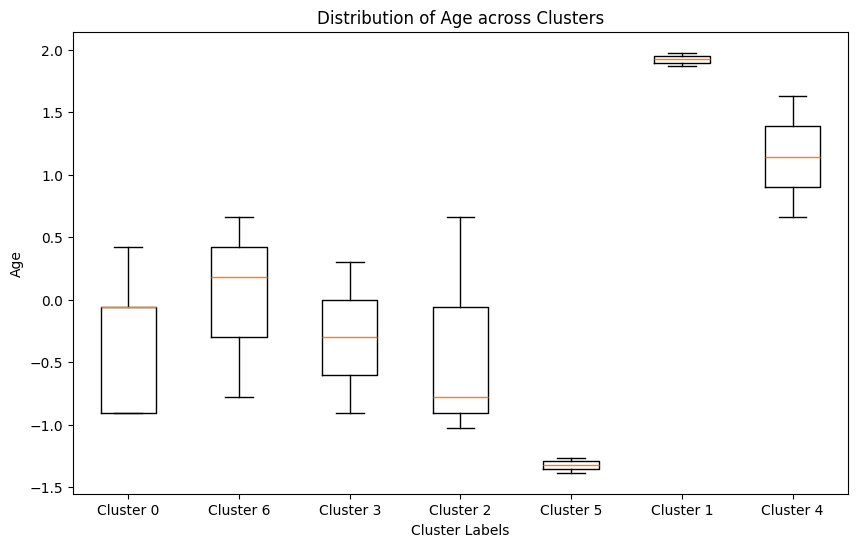

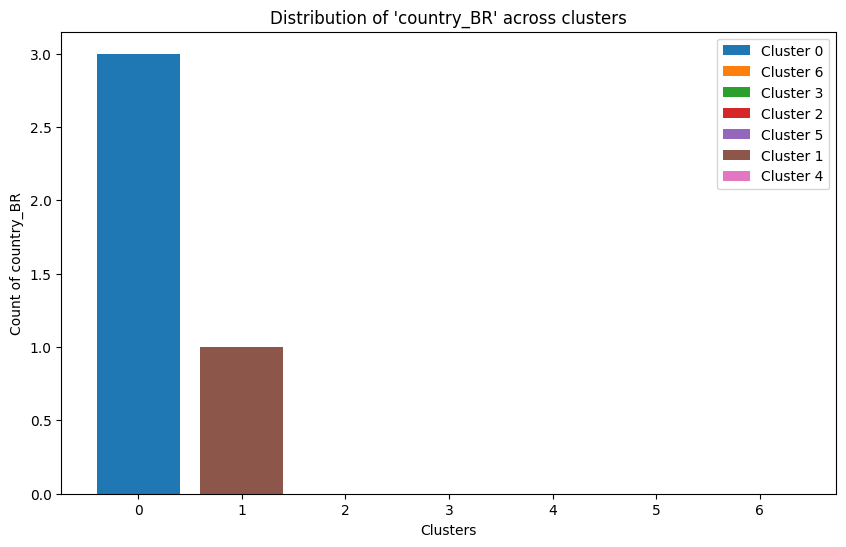

In [6]:
import matplotlib.pyplot as plt

# Assuming 'age' and 'ethnicity_Hispanic' are two most important features
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['age'], df_scaled['ethnicity_Hispanic'], c=df_scaled['cluster_labels'], cmap='viridis')
plt.xlabel('Age (Standardized)')
plt.ylabel('Ethnicity_Hispanic')
plt.title('Clusters Visualization (Age vs Ethnicity_Hispanic)')
plt.colorbar(label='Cluster Label')
plt.show()


plt.figure(figsize=(10, 6))
plt.boxplot([df_scaled[df_scaled['cluster_labels'] == i]['age'] for i in df_scaled['cluster_labels'].unique()],
            labels=[f"Cluster {i}" for i in df_scaled['cluster_labels'].unique()])
plt.xlabel('Cluster Labels')
plt.ylabel('Age')
plt.title('Distribution of Age across Clusters')
plt.show()

# Visualize the distribution of 'country' across clusters (example for 'country_BR')
plt.figure(figsize=(10, 6))
for cluster in df_scaled['cluster_labels'].unique():
  cluster_data = df_scaled[df_scaled['cluster_labels'] == cluster]
  plt.bar(cluster, cluster_data['country_BR'].sum(), label=f"Cluster {cluster}")
plt.xlabel("Clusters")
plt.ylabel("Count of country_BR")
plt.title("Distribution of 'country_BR' across clusters")
plt.legend()
plt.show()

# Add more visualizations for other features as needed.

## Data analysis

### Subtask:
Analyze the characteristics of each cluster identified in the previous step.


**Reasoning**:
Group the data by cluster labels and calculate descriptive statistics for relevant features to analyze the characteristics of each cluster.  Then create a summary table and provide brief descriptions for each cluster.



In [7]:
# Group data by cluster labels
grouped = df_scaled.groupby('cluster_labels')

# Calculate descriptive statistics for each cluster
cluster_characteristics = grouped[['age', 'country_BR', 'ethnicity_Hispanic']].agg(['mean', 'median', 'std'])

# Display the summary table
display(cluster_characteristics)

# Analyze the characteristics and provide descriptions
print("\nCluster Profiles:")
for cluster_label, stats in cluster_characteristics.iterrows():
    age_mean = stats['age']['mean']
    br_mean = stats['country_BR']['mean']
    hispanic_mean = stats['ethnicity_Hispanic']['mean']

    description = f"Cluster {cluster_label}: "
    if age_mean > 0:
        description += "Older women, "
    else:
        description += "Younger women, "
    if br_mean > 0.2:
        description += "predominantly from Brazil, "
    if hispanic_mean > 0.2:
        description += "predominantly Hispanic ethnicity"
    print(description)

age                     country_BR                   \
                    mean    median       std       mean median       std   
cluster_labels                                                             
0              -0.300612 -0.059641  0.584077        0.6    1.0  0.547723   
1               1.922352  1.922352  0.076677        0.5    0.5  0.707107   
2              -0.380936 -0.782556  0.912304        0.0    0.0  0.000000   
3              -0.300612 -0.300612  0.602429        0.0    0.0  0.000000   
4               1.145218  1.145218  0.681571        0.0    0.0  0.000000   
5              -1.324742 -1.324742  0.085196        0.0    0.0  0.000000   
6               0.020683  0.181331  0.736181        0.0    0.0  0.000000   

               ethnicity_Hispanic                   
                             mean median       std  
cluster_labels                                      
0                             1.0    1.0  0.000000  
1                             0.5    0.5  0.707107  
2                             0.0    0.0  0.000000  
3                             0.0    0.0  0.000000  
4                             0.0    0.0  0.000000  
5                             0.0    0.0  0.000000  
6                             0.0    0.0  0.000000


Cluster Profiles:
Cluster 0: Younger women, predominantly from Brazil, predominantly Hispanic ethnicity
Cluster 1: Older women, predominantly from Brazil, predominantly Hispanic ethnicity
Cluster 2: Younger women, 
Cluster 3: Younger women, 
Cluster 4: Older women, 
Cluster 5: Younger women, 
Cluster 6: Older women, 
